first 5 rows of the dataset:
  Customer ID  Age  Annual Income  Spending Score
0        C001   22          30000              78
1        C002   35          52000              40
2        C003   27          45000              66
3        C004   41          62000              32
4        C005   19          25000              88

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     20 non-null     object
 1   Age             20 non-null     int64 
 2   Annual Income   20 non-null     int64 
 3   Spending Score  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes
None

Missing values in dataset:
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

first 5 rows of scaled features:
[[-1.23170705  1.2454073  -1.40684374]
 [ 0.49003399 -0.82572957  0.2350959

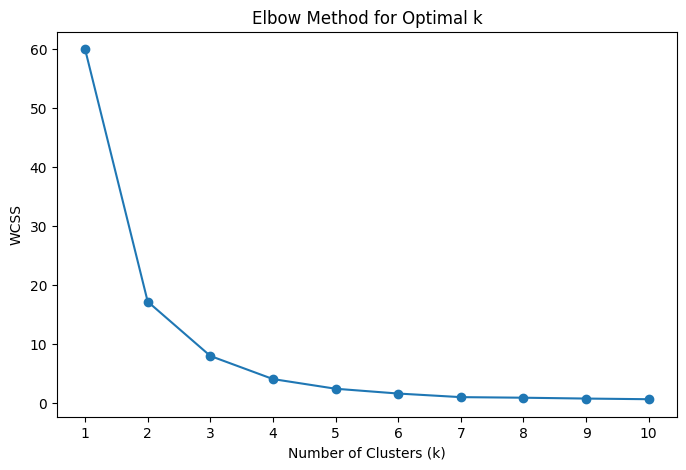


First 5 rows with cluster labels:
  Customer ID  Age  Annual Income  Spending Score  Cluster
0        C001   22          30000              78        2
1        C002   35          52000              40        1
2        C003   27          45000              66        0
3        C004   41          62000              32        1
4        C005   19          25000              88        2


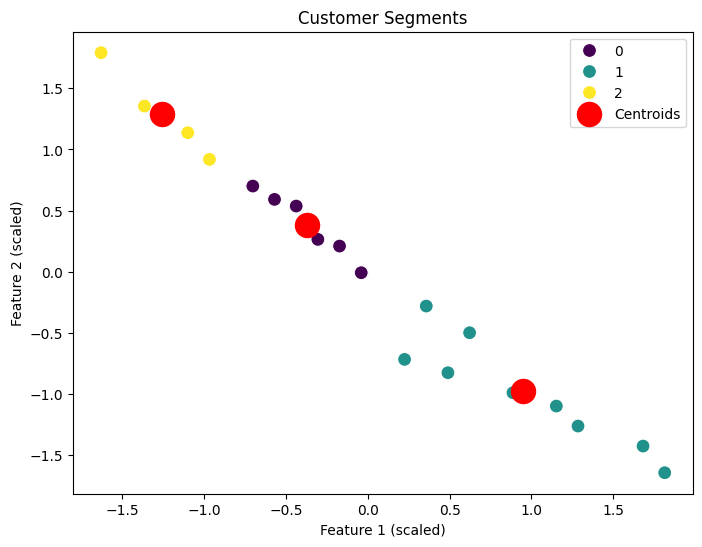

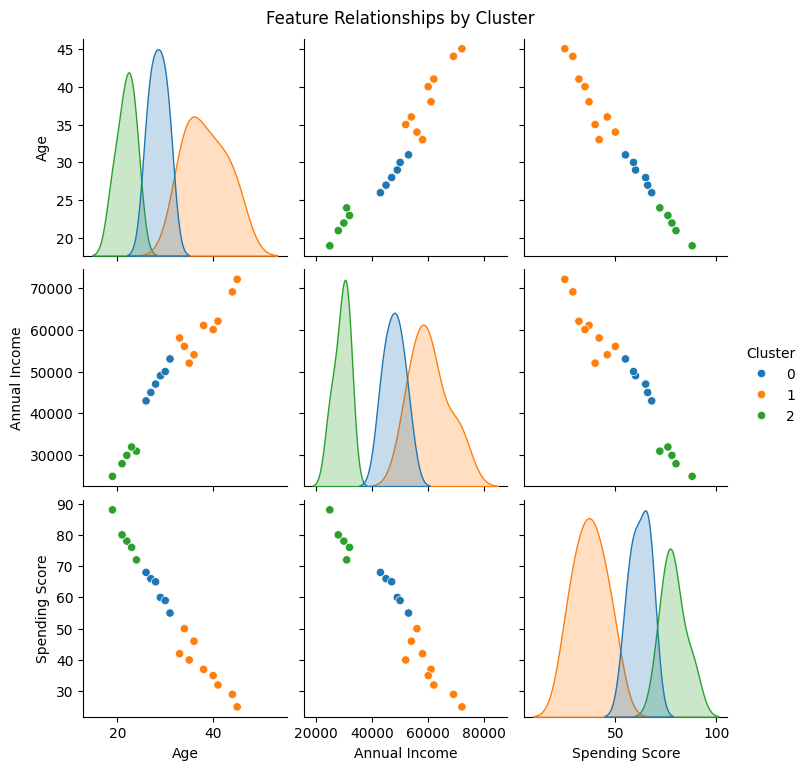

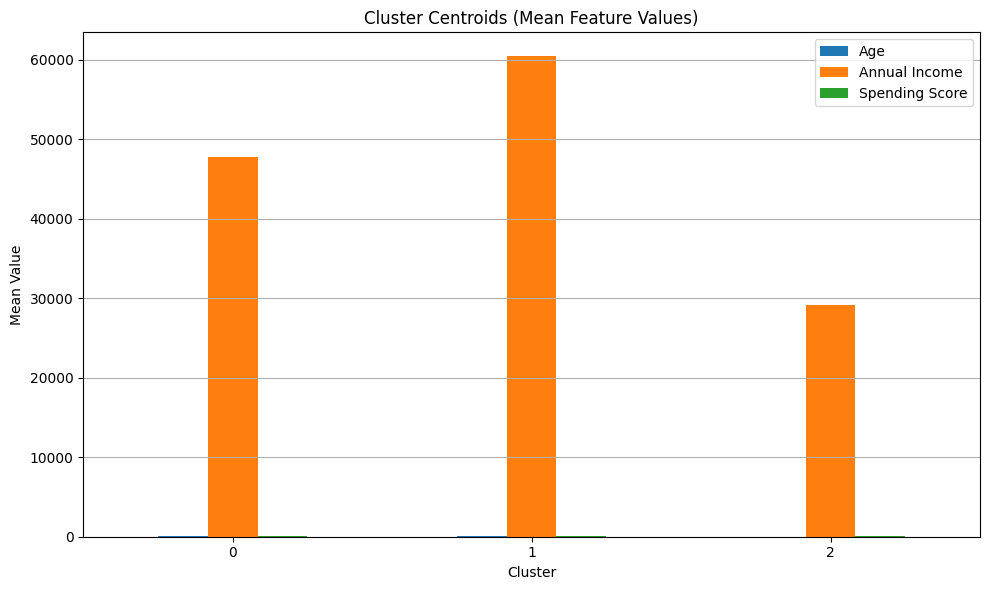

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('customer_data.csv')

#display the first few rows of the dataset
print("first 5 rows of the dataset:")
print(df.head())

#display basic information about the dataset
print("\nDataset Info:")
print(df.info())

#check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

features = df[['Age','Spending Score','Annual Income']]

scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

print("\nfirst 5 rows of scaled features:")
print(scaled_features[:5])

wcss = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range,wcss,marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

df['Cluster'] = cluster_labels

print("\nFirst 5 rows with cluster labels:")
print(df.head())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=cluster_labels,palette='viridis',s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

df['Cluster'] = cluster_labels

sns.pairplot(df[['Age', 'Annual Income', 'Spending Score', 'Cluster']],
             hue='Cluster', palette='tab10')
plt.suptitle('Feature Relationships by Cluster', y=1.02)
plt.show()

centroids_df = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()

centroids_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centroids (Mean Feature Values)')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
